In [1]:
import json
import keras
import pandas as pd
import keras.preprocessing.text as kpt
from keras.preprocessing.text import Tokenizer
import numpy as np
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, LSTM, SimpleRNN, Dropout, Activation, Embedding
from datetime import datetime
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

import json
from keras.models import model_from_json

# Import libraries
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
# nltk.download()
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

import string
import re

from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer

In [2]:
data = pd.read_csv('../nlp-getting-started/train.csv', encoding='utf-8')
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [3]:
#### removing entries where location values are missing
data_after_null_removal = data.copy()

#punctutation removal
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

data_afer_punctuation_removal = data_after_null_removal.copy()
data_afer_punctuation_removal['text'] = data_afer_punctuation_removal['text'].apply(lambda x: clean_text(x))
data_afer_punctuation_removal.head(10)

# Tockenization

def tokenization(text):
    text = re.split('\W+', text)
    return text

tockenized_data = data_afer_punctuation_removal.copy()
tockenized_data['text'] = tockenized_data['text'].apply(lambda x: tokenization(x.lower()))

# stopword removal 
data_after_stopword_removal = tockenized_data.copy()
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

data_after_stopword_removal['text'] = data_after_stopword_removal['text'].apply(lambda x: remove_stopwords(x))

# return to string
data_without_tockenization = data_after_stopword_removal.copy()
def listToString(s):     
    # initialize an empty string 
    str1 = " " 
    # return string   
    return (str1.join(s)) 
        
data_without_tockenization['text'] = data_without_tockenization['text'].apply(lambda x: listToString(x))
data_without_tockenization

# Lematizing the words
lemmatizer = WordNetLemmatizer()

def lementization(text):
    text = lemmatizer.lemmatize(text)
    return text

data_without_tockenization['text'] = data_without_tockenization['text'].apply(lambda x: lementization(x.lower()))
data_without_tockenization

[nltk_data] Downloading package stopwords to /home/tebogo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,keyword,location,text,target
0,1,NaN,NaN,deeds reason earthquake may allah forgive us,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,residents asked shelter place notified officers evacuation shelter place orders expected,1
3,6,NaN,NaN,people receive wildfires evacuation orders california,1
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pours school,1
...,...,...,...,...,...
7608,10869,NaN,NaN,two giant cranes holding bridge collapse nearby homes,1
7609,10870,NaN,NaN,ariaahrary thetawniest control wild fires california even northern part state troubling,1
7610,10871,NaN,NaN,volcano hawaii,1
7611,10872,NaN,NaN,police investigating ebike collided car little portugal ebike rider suffered serious nonlife thr...,1


In [4]:
df = data_without_tockenization.copy()

sentences = df['text'].values
y = df['target'].values

In [5]:
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, 
                                                                    y, test_size=0.1, random_state=42, shuffle=True)

In [6]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

# Tokenizers come with a convenient list of words and IDs
dictionary = tokenizer.word_index

# Saving the dictionary
with open('../Dictionary_Models/word2vec_models_dictionary_for_kerasVSword2vec.json', 'w') as dictionary_file:
    json.dump(dictionary, dictionary_file)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(sentences_train[2])
print(X_train[2])

cooking earlier got electrocuted crucial im psychic lol
[1413, 28, 358, 3, 82]


In [7]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [8]:

def tokenization(text):
    text = re.split('\W+', text)
    return text

tockenized_data = data_without_tockenization.copy()
tockenized_data['text'] = tockenized_data['text'].apply(lambda x: tokenization(x.lower()))

tockenized_data.head()

tweet_data = tockenized_data['text']
tweet_data[1]

tweet_data_array = []

for arr in tweet_data:
    tweet_data_array.append(arr)

#### useful functions

In [19]:
# load embedding as a dict
def load_embedding(filename):
# load embedding into memory, skip first line
    file = open(filename,'r')
    lines = file.readlines()[1:]
    file.close()
    # create a map of words to vectors
    embedding = dict()
    for line in lines:
        parts = line.split()
        # key is string word, value is numpy array for vector
        embedding[parts[0]] = np.asarray(parts[1:], dtype='float32')
    return embedding

In [54]:
# create a weight matrix for the Embedding layer from a loaded embedding
def get_weight_matrix(embedding, vocab, embDim):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, embDim))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        weight_matrix[i] = embedding.get(word)
    return weight_matrix

In [25]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [27]:
def rounding(results):
    '''Results needs to be rounded to 0 or 1 for fake or real, respectively'''
    if results < 0.5:
        return 0
    else:
        return 1

### CBOW

### 50 iterations

In [17]:
from gensim.models import Word2Vec, KeyedVectors
# train word2vec model

embedding_dim = 50
windowSize =5 
num_iterations = 50


model = Word2Vec(sentences=tweet_data_array, size=embedding_dim, window=windowSize, workers=3, min_count=1,
                 negative=20, iter=num_iterations,seed=1000,sg=0)
# summarize vocabulary size in model
words = list(model.wv.vocab)
print('Vocabulary size: %d' % len(words))
    
# save model in ASCII (word2vec) format
filename = '../Embedding_Models/embedding_word2vec_w'+str(windowSize)+'_dim'+str(embedding_dim)+'_iter'+str(num_iterations)+'.txt'
model.wv.save_word2vec_format(filename, binary=False)

Vocabulary size: 16435


In [24]:

# load embedding from file
raw_embedding = load_embedding(filename)
# get vectors in the right order
embedding_vectors = get_weight_matrix(raw_embedding, tokenizer.word_index, embedding_dim)
# create the embedding layer
embedding_layer = Embedding(vocab_size, embedding_dim, weights=[embedding_vectors], input_length=maxlen, trainable=False)

In [22]:
from keras import layers
# define model
model = Sequential()
model.add(embedding_layer)
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy','Precision','Recall'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 50)           769850    
_________________________________________________________________
global_max_pooling1d (Global (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                510       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 770,371
Trainable params: 521
Non-trainable params: 769,850
_________________________________________________________________


In [23]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=1,
                    validation_split=0.1,
                    batch_size=16,
                   callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1)])

Epoch 1/50
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
386/386 [==============================] - 6s 17ms/step - loss: 0.6401 - accuracy: 0.6787 - precision: 0.6215 - recall: 0.6317 - val_loss: 0.5832 - val_accuracy: 0.7274 - val_precision: 0.7038 - val_recall: 0.6645
Epoch 2/50
386/386 [==============================] - 7s 18ms/step - loss: 0.5634 - accuracy: 0.7298 - precision: 0.6962 - recall: 0.6507 - val_loss: 0.5619 - val_accuracy: 0.7230 - val_precision: 0.6913 - val_recall: 0.6776
Epoch 3/50
386/386 [==============================] - 7s 17ms/step - loss: 0.5428 - accuracy: 0.7447 - precision: 0.7155 - recall: 0.6670 - val_loss: 0.5506 - val_accuracy: 0.7347 - val_precision: 0.6981 - val_recall: 0.7072
Epoch 4/50
386/386 [==============================] - 6s 15ms/step - loss: 0.5291 - accuracy: 0.7476 - precision: 0.7222 - recall: 0.6640 - val_loss: 0.5498 - val_accuracy: 0.7347 - val_precision: 0.7542 - val_recall: 0.5954
Epoch 5/50
386/386 

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])


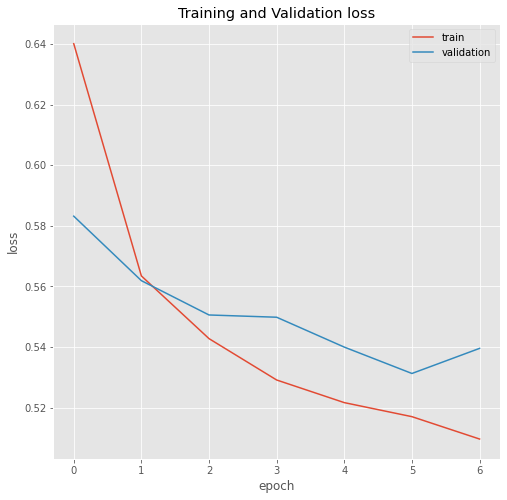

In [26]:
print(history.history.keys())
# summarize history for loss
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [28]:
predictions = []
Y_pred = model.predict_generator(X_test)
    
predictions_final = [rounding(x) for x in Y_pred]

tn, fp, fn, tp = confusion_matrix(y_test, predictions_final).ravel()
precision= tp / (tp + fp)
accuracy = (tp + tn) / (tn + fp +fn+tp)
falsePositiveRate = fp / (fp + tn)
recall = tp/(tp+fn)
f1= 2 * ((recall*precision)/(recall+precision))

# Intialise data to Dicts of series. 
d = {'Value' : pd.Series([accuracy, precision, falsePositiveRate, recall,f1], index =['Accuracy', 'Precision', 'FPR','Recall','F1'])} 
  
# creates Dataframe. 
results = pd.DataFrame(d) 
  

data = {'Negative':[tn, fn], 'Positive':[fp, tp]} 
  
# Creates pandas DataFrame. 
df= pd.DataFrame(data, index =['Negative', 'Positive']) 
df

Instructions for updating:
Please use Model.predict, which supports generators.


,Negative,Positive
Negative,366,60
Positive,156,180


In [29]:
results

,Value
Accuracy,0.716535
Precision,0.750000
FPR,0.140845
Recall,0.535714
F1,0.625000


#### 30 iterations

In [37]:
from gensim.models import Word2Vec, KeyedVectors
# train word2vec model

embedding_dim = 50
windowSize =5 
num_iterations = 30


model = Word2Vec(sentences=tweet_data_array, size=embedding_dim, window=windowSize, workers=3, min_count=1,
                 negative=20, iter=num_iterations,seed=1000,sg=0)
# summarize vocabulary size in model
words = list(model.wv.vocab)
print('Vocabulary size: %d' % len(words))
    
# save model in ASCII (word2vec) format
filename = '../Embedding_Models/embedding_word2vec_w'+str(windowSize)+'_dim'+str(embedding_dim)+'_iter'+str(num_iterations)+'.txt'
model.wv.save_word2vec_format(filename, binary=False)

Vocabulary size: 16435


In [38]:

# load embedding from file
raw_embedding = load_embedding(filename)
# get vectors in the right order
embedding_vectors = get_weight_matrix(raw_embedding, tokenizer.word_index, embedding_dim)
# create the embedding layer
embedding_layer = Embedding(vocab_size, embedding_dim, weights=[embedding_vectors], input_length=maxlen, trainable=False)

In [39]:
from keras import layers
# define model
model = Sequential()
model.add(embedding_layer)
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy','Precision','Recall'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 50)           769850    
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 770,371
Trainable params: 521
Non-trainable params: 769,850
_________________________________________________________________


In [40]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=1,
                    validation_split=0.1,
                    batch_size=16,
                   callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1)])

Epoch 1/50
386/386 [==============================] - 7s 19ms/step - loss: 0.6340 - accuracy: 0.6788 - precision: 0.6535 - recall: 0.5268 - val_loss: 0.5881 - val_accuracy: 0.7114 - val_precision: 0.7208 - val_recall: 0.5691
Epoch 2/50
386/386 [==============================] - 6s 16ms/step - loss: 0.5471 - accuracy: 0.7397 - precision: 0.7094 - recall: 0.6606 - val_loss: 0.5641 - val_accuracy: 0.7245 - val_precision: 0.7032 - val_recall: 0.6546
Epoch 3/50
386/386 [==============================] - 7s 17ms/step - loss: 0.5347 - accuracy: 0.7424 - precision: 0.7159 - recall: 0.6572 - val_loss: 0.5616 - val_accuracy: 0.7362 - val_precision: 0.7393 - val_recall: 0.6250
Epoch 4/50
386/386 [==============================] - 6s 16ms/step - loss: 0.5279 - accuracy: 0.7478 - precision: 0.7229 - recall: 0.6632 - val_loss: 0.5533 - val_accuracy: 0.7318 - val_precision: 0.7222 - val_recall: 0.6414
Epoch 5/50
386/386 [==============================] - 7s 18ms/step - loss: 0.5227 - accuracy: 0.7515

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])


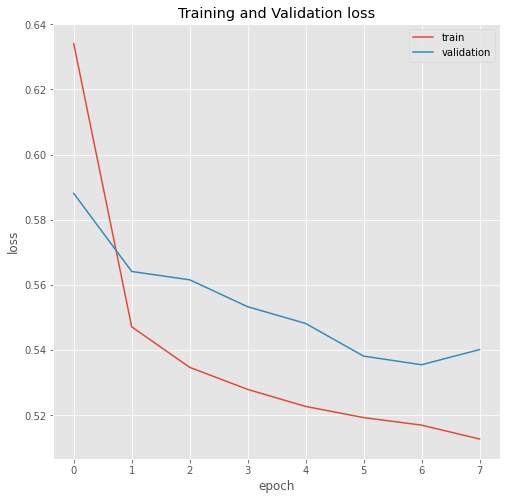

In [41]:
print(history.history.keys())
# summarize history for loss
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [42]:
predictions = []
Y_pred = model.predict_generator(X_test)
    
predictions_final = [rounding(x) for x in Y_pred]

tn, fp, fn, tp = confusion_matrix(y_test, predictions_final).ravel()
precision= tp / (tp + fp)
accuracy = (tp + tn) / (tn + fp +fn+tp)
falsePositiveRate = fp / (fp + tn)
recall = tp/(tp+fn)
f1= 2 * ((recall*precision)/(recall+precision))

# Intialise data to Dicts of series. 
d = {'Value' : pd.Series([accuracy, precision, falsePositiveRate, recall,f1], index =['Accuracy', 'Precision', 'FPR','Recall','F1'])} 
  
# creates Dataframe. 
results = pd.DataFrame(d) 
  

data = {'Negative':[tn, fn], 'Positive':[fp, tp]} 
  
# Creates pandas DataFrame. 
df= pd.DataFrame(data, index =['Negative', 'Positive']) 
df

,Negative,Positive
Negative,357,69
Positive,153,183


In [43]:
results

,Value
Accuracy,0.708661
Precision,0.726190
FPR,0.161972
Recall,0.544643
F1,0.622449


#### 100 iterations

In [44]:
from gensim.models import Word2Vec, KeyedVectors
# train word2vec model

embedding_dim = 50
windowSize =5 
num_iterations = 100


model = Word2Vec(sentences=tweet_data_array, size=embedding_dim, window=windowSize, workers=3, min_count=1,
                 negative=20, iter=num_iterations,seed=1000,sg=0)
# summarize vocabulary size in model
words = list(model.wv.vocab)
print('Vocabulary size: %d' % len(words))
    
# save model in ASCII (word2vec) format
filename = '../Embedding_Models/embedding_word2vec_w'+str(windowSize)+'_dim'+str(embedding_dim)+'_iter'+str(num_iterations)+'.txt'
model.wv.save_word2vec_format(filename, binary=False)

Vocabulary size: 16435


In [45]:

# load embedding from file
raw_embedding = load_embedding(filename)
# get vectors in the right order
embedding_vectors = get_weight_matrix(raw_embedding, tokenizer.word_index, embedding_dim)
# create the embedding layer
embedding_layer = Embedding(vocab_size, embedding_dim, weights=[embedding_vectors], input_length=maxlen, trainable=False)

In [46]:
from keras import layers
# define model
model = Sequential()
model.add(embedding_layer)
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy','Precision','Recall'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 50)           769850    
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 770,371
Trainable params: 521
Non-trainable params: 769,850
_________________________________________________________________


In [47]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=1,
                    validation_split=0.1,
                    batch_size=16,
                   callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1)])

Epoch 1/50
386/386 [==============================] - 6s 16ms/step - loss: 0.7254 - accuracy: 0.6328 - precision: 0.5719 - recall: 0.5545 - val_loss: 0.6115 - val_accuracy: 0.6983 - val_precision: 0.6667 - val_recall: 0.6382
Epoch 2/50
386/386 [==============================] - 6s 15ms/step - loss: 0.5874 - accuracy: 0.7113 - precision: 0.6755 - recall: 0.6226 - val_loss: 0.5765 - val_accuracy: 0.7128 - val_precision: 0.6931 - val_recall: 0.6316
Epoch 3/50
386/386 [==============================] - 7s 18ms/step - loss: 0.5574 - accuracy: 0.7299 - precision: 0.6999 - recall: 0.6427 - val_loss: 0.5591 - val_accuracy: 0.7303 - val_precision: 0.7117 - val_recall: 0.6579
Epoch 4/50
386/386 [==============================] - 6s 16ms/step - loss: 0.5434 - accuracy: 0.7382 - precision: 0.7121 - recall: 0.6488 - val_loss: 0.5562 - val_accuracy: 0.7303 - val_precision: 0.7003 - val_recall: 0.6842
Epoch 5/50
386/386 [==============================] - 6s 17ms/step - loss: 0.5315 - accuracy: 0.7479

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])


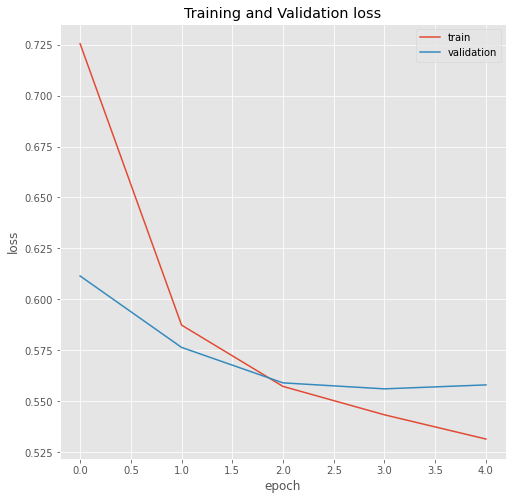

In [48]:
print(history.history.keys())
# summarize history for loss
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [49]:
predictions = []
Y_pred = model.predict_generator(X_test)
    
predictions_final = [rounding(x) for x in Y_pred]

tn, fp, fn, tp = confusion_matrix(y_test, predictions_final).ravel()
precision= tp / (tp + fp)
accuracy = (tp + tn) / (tn + fp +fn+tp)
falsePositiveRate = fp / (fp + tn)
recall = tp/(tp+fn)
f1= 2 * ((recall*precision)/(recall+precision))

# Intialise data to Dicts of series. 
d = {'Value' : pd.Series([accuracy, precision, falsePositiveRate, recall,f1], index =['Accuracy', 'Precision', 'FPR','Recall','F1'])} 
  
# creates Dataframe. 
results = pd.DataFrame(d) 
  

data = {'Negative':[tn, fn], 'Positive':[fp, tp]} 
  
# Creates pandas DataFrame. 
df= pd.DataFrame(data, index =['Negative', 'Positive']) 
df

,Negative,Positive
Negative,357,69
Positive,161,175


In [50]:
results

,Value
Accuracy,0.698163
Precision,0.717213
FPR,0.161972
Recall,0.520833
F1,0.603448


#### other parameters

In [103]:
from gensim.models import Word2Vec, KeyedVectors
# train word2vec model

embedding_dim = 150
windowSize =5 
num_iterations = 50


model = Word2Vec(sentences=tweet_data_array, size=embedding_dim, window=windowSize, workers=3, min_count=1,
                 negative=20, iter=num_iterations,seed=1000,sg=0)
# summarize vocabulary size in model
words = list(model.wv.vocab)
print('Vocabulary size: %d' % len(words))
    
# save model in ASCII (word2vec) format
filename = '../Embedding_Models/embedding_word2vec_w'+str(windowSize)+'_dim'+str(embedding_dim)+'_iter'+str(num_iterations)+'.txt'
model.wv.save_word2vec_format(filename, binary=False)

Vocabulary size: 16435


In [104]:

# load embedding from file
raw_embedding = load_embedding(filename)
# get vectors in the right order
embedding_vectors = get_weight_matrix(raw_embedding, tokenizer.word_index, embedding_dim)
# create the embedding layer
embedding_layer = Embedding(vocab_size, embedding_dim, weights=[embedding_vectors], input_length=maxlen, trainable=False)

In [105]:
from keras import layers
# define model
model = Sequential()
model.add(embedding_layer)
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy','Precision','Recall'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 100, 150)          2309550   
_________________________________________________________________
global_max_pooling1d_11 (Glo (None, 150)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                1510      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 11        
Total params: 2,311,071
Trainable params: 1,521
Non-trainable params: 2,309,550
_________________________________________________________________


In [106]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=1,
                    validation_split=0.1,
                    batch_size=16,
                   callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1)])

Epoch 1/50
386/386 [==============================] - 6s 15ms/step - loss: 0.6164 - accuracy: 0.6659 - precision: 0.6112 - recall: 0.5964 - val_loss: 0.5591 - val_accuracy: 0.7289 - val_precision: 0.7201 - val_recall: 0.6349
Epoch 2/50
386/386 [==============================] - 6s 15ms/step - loss: 0.5400 - accuracy: 0.7421 - precision: 0.7034 - recall: 0.6842 - val_loss: 0.5423 - val_accuracy: 0.7362 - val_precision: 0.7071 - val_recall: 0.6908
Epoch 3/50
386/386 [==============================] - 6s 15ms/step - loss: 0.5196 - accuracy: 0.7569 - precision: 0.7253 - recall: 0.6925 - val_loss: 0.5309 - val_accuracy: 0.7318 - val_precision: 0.6840 - val_recall: 0.7336
Epoch 4/50
386/386 [==============================] - 6s 14ms/step - loss: 0.5078 - accuracy: 0.7645 - precision: 0.7372 - recall: 0.6963 - val_loss: 0.5308 - val_accuracy: 0.7434 - val_precision: 0.7119 - val_recall: 0.7072
Epoch 5/50
386/386 [==============================] - 6s 15ms/step - loss: 0.4999 - accuracy: 0.7674

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])


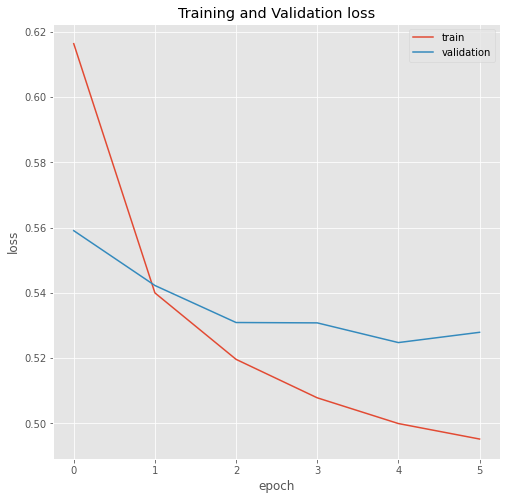

In [107]:
print(history.history.keys())
# summarize history for loss
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [108]:
predictions = []
Y_pred = model.predict_generator(X_test)
    
predictions_final = [rounding(x) for x in Y_pred]

tn, fp, fn, tp = confusion_matrix(y_test, predictions_final).ravel()
precision= tp / (tp + fp)
accuracy = (tp + tn) / (tn + fp +fn+tp)
falsePositiveRate = fp / (fp + tn)
recall = tp/(tp+fn)
f1= 2 * ((recall*precision)/(recall+precision))

# Intialise data to Dicts of series. 
d = {'Value' : pd.Series([accuracy, precision, falsePositiveRate, recall,f1], index =['Accuracy', 'Precision', 'FPR','Recall','F1'])} 
  
# creates Dataframe. 
results = pd.DataFrame(d) 
  

data = {'Negative':[tn, fn], 'Positive':[fp, tp]} 
  
# Creates pandas DataFrame. 
df= pd.DataFrame(data, index =['Negative', 'Positive']) 
df

,Negative,Positive
Negative,318,108
Positive,97,239


In [109]:
results 

,Value
Accuracy,0.730971
Precision,0.688761
FPR,0.253521
Recall,0.711310
F1,0.699854


- The best performance for other parameters is yielded by:
    - window size = 5
    - embedding dimension = 150
    - num iterations = 50

### Skip-Gram

#### 50 iterations

In [112]:
from gensim.models import Word2Vec, KeyedVectors
# train word2vec model

embedding_dim = 50
windowSize =5 
num_iterations = 50


model = Word2Vec(sentences=tweet_data_array, size=embedding_dim, window=windowSize, workers=3, min_count=1,
                 negative=20, iter=num_iterations,seed=1000,sg=1)
# summarize vocabulary size in model
words = list(model.wv.vocab)
print('Vocabulary size: %d' % len(words))
    
# save model in ASCII (word2vec) format
filename = '../Embedding_Models/embedding_word2vec_SG_w'+str(windowSize)+'_dim'+str(embedding_dim)+'_iter'+str(num_iterations)+'.txt'
model.wv.save_word2vec_format(filename, binary=False)

Vocabulary size: 16435


In [113]:

# load embedding from file
raw_embedding = load_embedding(filename)
# get vectors in the right order
embedding_vectors = get_weight_matrix(raw_embedding, tokenizer.word_index, embedding_dim)
# create the embedding layer
embedding_layer = Embedding(vocab_size, embedding_dim, weights=[embedding_vectors], input_length=maxlen, trainable=False)

In [114]:
from keras import layers
# define model
model = Sequential()
model.add(embedding_layer)
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy','Precision','Recall'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 100, 50)           769850    
_________________________________________________________________
global_max_pooling1d_12 (Glo (None, 50)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 11        
Total params: 770,371
Trainable params: 521
Non-trainable params: 769,850
_________________________________________________________________


In [115]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=1,
                    validation_split=0.1,
                    batch_size=16,
                   callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1)])

Epoch 1/50
386/386 [==============================] - 7s 17ms/step - loss: 0.6451 - accuracy: 0.6307 - precision: 0.6054 - recall: 0.3865 - val_loss: 0.6099 - val_accuracy: 0.6793 - val_precision: 0.6438 - val_recall: 0.6184
Epoch 2/50
386/386 [==============================] - 5s 14ms/step - loss: 0.5642 - accuracy: 0.7213 - precision: 0.7026 - recall: 0.6017 - val_loss: 0.5631 - val_accuracy: 0.6997 - val_precision: 0.6828 - val_recall: 0.6020
Epoch 3/50
386/386 [==============================] - 6s 14ms/step - loss: 0.5397 - accuracy: 0.7387 - precision: 0.7200 - recall: 0.6344 - val_loss: 0.5519 - val_accuracy: 0.7085 - val_precision: 0.6806 - val_recall: 0.6447
Epoch 4/50
386/386 [==============================] - 5s 14ms/step - loss: 0.5324 - accuracy: 0.7450 - precision: 0.7281 - recall: 0.6423 - val_loss: 0.5517 - val_accuracy: 0.7187 - val_precision: 0.7176 - val_recall: 0.6020
Epoch 5/50
386/386 [==============================] - 5s 13ms/step - loss: 0.5295 - accuracy: 0.7450

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])


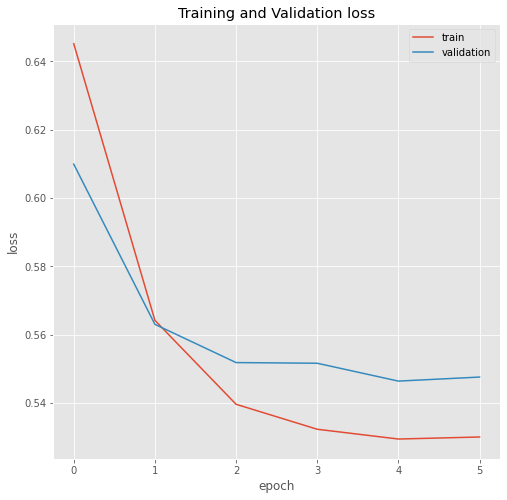

In [116]:
print(history.history.keys())
# summarize history for loss
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [117]:
predictions = []
Y_pred = model.predict_generator(X_test)
    
predictions_final = [rounding(x) for x in Y_pred]

tn, fp, fn, tp = confusion_matrix(y_test, predictions_final).ravel()
precision= tp / (tp + fp)
accuracy = (tp + tn) / (tn + fp +fn+tp)
falsePositiveRate = fp / (fp + tn)
recall = tp/(tp+fn)
f1= 2 * ((recall*precision)/(recall+precision))

# Intialise data to Dicts of series. 
d = {'Value' : pd.Series([accuracy, precision, falsePositiveRate, recall,f1], index =['Accuracy', 'Precision', 'FPR','Recall','F1'])} 
  
# creates Dataframe. 
results = pd.DataFrame(d) 
  

data = {'Negative':[tn, fn], 'Positive':[fp, tp]} 
  
# Creates pandas DataFrame. 
df= pd.DataFrame(data, index =['Negative', 'Positive']) 
df

,Negative,Positive
Negative,322,104
Positive,118,218


In [118]:
results

,Value
Accuracy,0.708661
Precision,0.677019
FPR,0.244131
Recall,0.648810
F1,0.662614


#### 30 iterations

In [119]:
from gensim.models import Word2Vec, KeyedVectors
# train word2vec model

embedding_dim = 50
windowSize =5 
num_iterations = 30


model = Word2Vec(sentences=tweet_data_array, size=embedding_dim, window=windowSize, workers=3, min_count=1,
                 negative=20, iter=num_iterations,seed=1000,sg=1)
# summarize vocabulary size in model
words = list(model.wv.vocab)
print('Vocabulary size: %d' % len(words))
    
# save model in ASCII (word2vec) format
filename = '../Embedding_Models/embedding_word2vec_SG_w'+str(windowSize)+'_dim'+str(embedding_dim)+'_iter'+str(num_iterations)+'.txt'
model.wv.save_word2vec_format(filename, binary=False)

Vocabulary size: 16435


In [120]:

# load embedding from file
raw_embedding = load_embedding(filename)
# get vectors in the right order
embedding_vectors = get_weight_matrix(raw_embedding, tokenizer.word_index, embedding_dim)
# create the embedding layer
embedding_layer = Embedding(vocab_size, embedding_dim, weights=[embedding_vectors], input_length=maxlen, trainable=False)

In [121]:
from keras import layers
# define model
model = Sequential()
model.add(embedding_layer)
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy','Precision','Recall'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 100, 50)           769850    
_________________________________________________________________
global_max_pooling1d_13 (Glo (None, 50)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 11        
Total params: 770,371
Trainable params: 521
Non-trainable params: 769,850
_________________________________________________________________


In [122]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=1,
                    validation_split=0.1,
                    batch_size=16,
                   callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1)])

Epoch 1/50
386/386 [==============================] - 7s 18ms/step - loss: 0.6631 - accuracy: 0.5990 - precision: 0.5381 - recall: 0.4265 - val_loss: 0.6095 - val_accuracy: 0.6560 - val_precision: 0.6156 - val_recall: 0.5954
Epoch 2/50
386/386 [==============================] - 6s 15ms/step - loss: 0.5890 - accuracy: 0.7012 - precision: 0.6767 - recall: 0.5743 - val_loss: 0.5627 - val_accuracy: 0.7099 - val_precision: 0.6744 - val_recall: 0.6678
Epoch 3/50
386/386 [==============================] - 6s 15ms/step - loss: 0.5510 - accuracy: 0.7322 - precision: 0.7129 - recall: 0.6237 - val_loss: 0.5462 - val_accuracy: 0.7187 - val_precision: 0.7063 - val_recall: 0.6250
Epoch 4/50
386/386 [==============================] - 6s 16ms/step - loss: 0.5355 - accuracy: 0.7421 - precision: 0.7245 - recall: 0.6385 - val_loss: 0.5430 - val_accuracy: 0.7201 - val_precision: 0.6806 - val_recall: 0.6941
Epoch 5/50
386/386 [==============================] - 6s 16ms/step - loss: 0.5273 - accuracy: 0.7505

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])


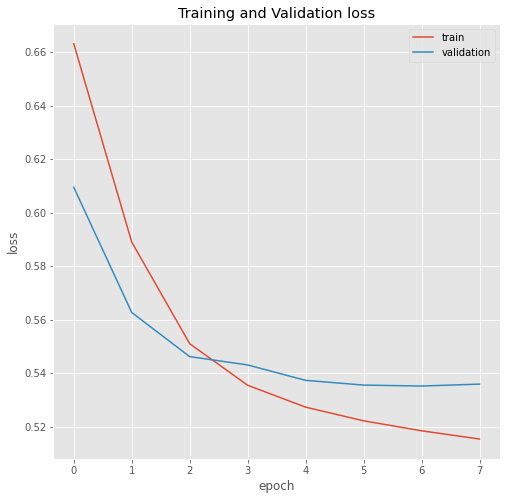

In [123]:
print(history.history.keys())
# summarize history for loss
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [124]:
predictions = []
Y_pred = model.predict_generator(X_test)
    
predictions_final = [rounding(x) for x in Y_pred]

tn, fp, fn, tp = confusion_matrix(y_test, predictions_final).ravel()
precision= tp / (tp + fp)
accuracy = (tp + tn) / (tn + fp +fn+tp)
falsePositiveRate = fp / (fp + tn)
recall = tp/(tp+fn)
f1= 2 * ((recall*precision)/(recall+precision))

# Intialise data to Dicts of series. 
d = {'Value' : pd.Series([accuracy, precision, falsePositiveRate, recall,f1], index =['Accuracy', 'Precision', 'FPR','Recall','F1'])} 
  
# creates Dataframe. 
results = pd.DataFrame(d) 
  

data = {'Negative':[tn, fn], 'Positive':[fp, tp]} 
  
# Creates pandas DataFrame. 
df= pd.DataFrame(data, index =['Negative', 'Positive']) 
df

,Negative,Positive
Negative,340,86
Positive,147,189


In [125]:
results

,Value
Accuracy,0.694226
Precision,0.687273
FPR,0.201878
Recall,0.562500
F1,0.618658


#### 100 iterations

In [126]:
from gensim.models import Word2Vec, KeyedVectors
# train word2vec model

embedding_dim = 50
windowSize =5 
num_iterations = 100


model = Word2Vec(sentences=tweet_data_array, size=embedding_dim, window=windowSize, workers=3, min_count=1,
                 negative=20, iter=num_iterations,seed=1000,sg=1)
# summarize vocabulary size in model
words = list(model.wv.vocab)
print('Vocabulary size: %d' % len(words))
    
# save model in ASCII (word2vec) format
filename = '../Embedding_Models/embedding_word2vec_SG_w'+str(windowSize)+'_dim'+str(embedding_dim)+'_iter'+str(num_iterations)+'.txt'
model.wv.save_word2vec_format(filename, binary=False)

Vocabulary size: 16435


In [127]:

# load embedding from file
raw_embedding = load_embedding(filename)
# get vectors in the right order
embedding_vectors = get_weight_matrix(raw_embedding, tokenizer.word_index, embedding_dim)
# create the embedding layer
embedding_layer = Embedding(vocab_size, embedding_dim, weights=[embedding_vectors], input_length=maxlen, trainable=False)

In [128]:
from keras import layers
# define model
model = Sequential()
model.add(embedding_layer)
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy','Precision','Recall'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 100, 50)           769850    
_________________________________________________________________
global_max_pooling1d_14 (Glo (None, 50)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 11        
Total params: 770,371
Trainable params: 521
Non-trainable params: 769,850
_________________________________________________________________


In [129]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=1,
                    validation_split=0.1,
                    batch_size=16,
                   callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1)])

Epoch 1/50
386/386 [==============================] - 7s 17ms/step - loss: 0.6588 - accuracy: 0.6167 - precision: 0.5580 - recall: 0.4903 - val_loss: 0.6239 - val_accuracy: 0.6778 - val_precision: 0.7485 - val_recall: 0.4112
Epoch 2/50
386/386 [==============================] - 6s 16ms/step - loss: 0.5772 - accuracy: 0.7027 - precision: 0.6778 - recall: 0.5781 - val_loss: 0.5643 - val_accuracy: 0.7172 - val_precision: 0.7115 - val_recall: 0.6086
Epoch 3/50
386/386 [==============================] - 6s 15ms/step - loss: 0.5490 - accuracy: 0.7330 - precision: 0.7163 - recall: 0.6199 - val_loss: 0.5498 - val_accuracy: 0.7245 - val_precision: 0.7170 - val_recall: 0.6250
Epoch 4/50
386/386 [==============================] - 6s 16ms/step - loss: 0.5410 - accuracy: 0.7361 - precision: 0.7173 - recall: 0.6298 - val_loss: 0.5413 - val_accuracy: 0.7376 - val_precision: 0.7348 - val_recall: 0.6382
Epoch 5/50
386/386 [==============================] - 7s 17ms/step - loss: 0.5356 - accuracy: 0.7429

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])


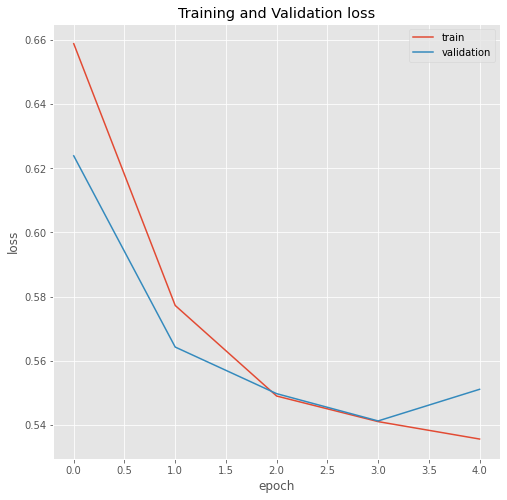

In [130]:
print(history.history.keys())
# summarize history for loss
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [131]:
predictions = []
Y_pred = model.predict_generator(X_test)
    
predictions_final = [rounding(x) for x in Y_pred]

tn, fp, fn, tp = confusion_matrix(y_test, predictions_final).ravel()
precision= tp / (tp + fp)
accuracy = (tp + tn) / (tn + fp +fn+tp)
falsePositiveRate = fp / (fp + tn)
recall = tp/(tp+fn)
f1= 2 * ((recall*precision)/(recall+precision))

# Intialise data to Dicts of series. 
d = {'Value' : pd.Series([accuracy, precision, falsePositiveRate, recall,f1], index =['Accuracy', 'Precision', 'FPR','Recall','F1'])} 
  
# creates Dataframe. 
results = pd.DataFrame(d) 
  

data = {'Negative':[tn, fn], 'Positive':[fp, tp]} 
  
# Creates pandas DataFrame. 
df= pd.DataFrame(data, index =['Negative', 'Positive']) 
df

,Negative,Positive
Negative,365,61
Positive,156,180


In [132]:
results

,Value
Accuracy,0.715223
Precision,0.746888
FPR,0.143192
Recall,0.535714
F1,0.623917
